In [11]:
import numpy as np
from numpy import array, sqrt
from hw import Henrard, Jamshidian, hw_helper 
from fox_toolbox.utils import xml_parser, rates, volatility
from mc import mc

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6.)})
sns.set_style("whitegrid")

In [37]:
T = 5.
U = T 
t = 4.

spotstep = 100
timestep = 100

x0 = 0.

np.random.seed(42)

tt = np.linspace(0, T, spotstep+1)

In [38]:
mr = 0.05
sigma = rates.Curve(array([ 0.  , 1. , 30.  ]), array([0.01, 0.01, 0.01]), 'PieceWise', '')

Risk neutral diffusiuon
<font size="5">
$X_{t+1} = X_t - aX_tdt + \sigma_t\sqrt{dt} \xi$
    </font>

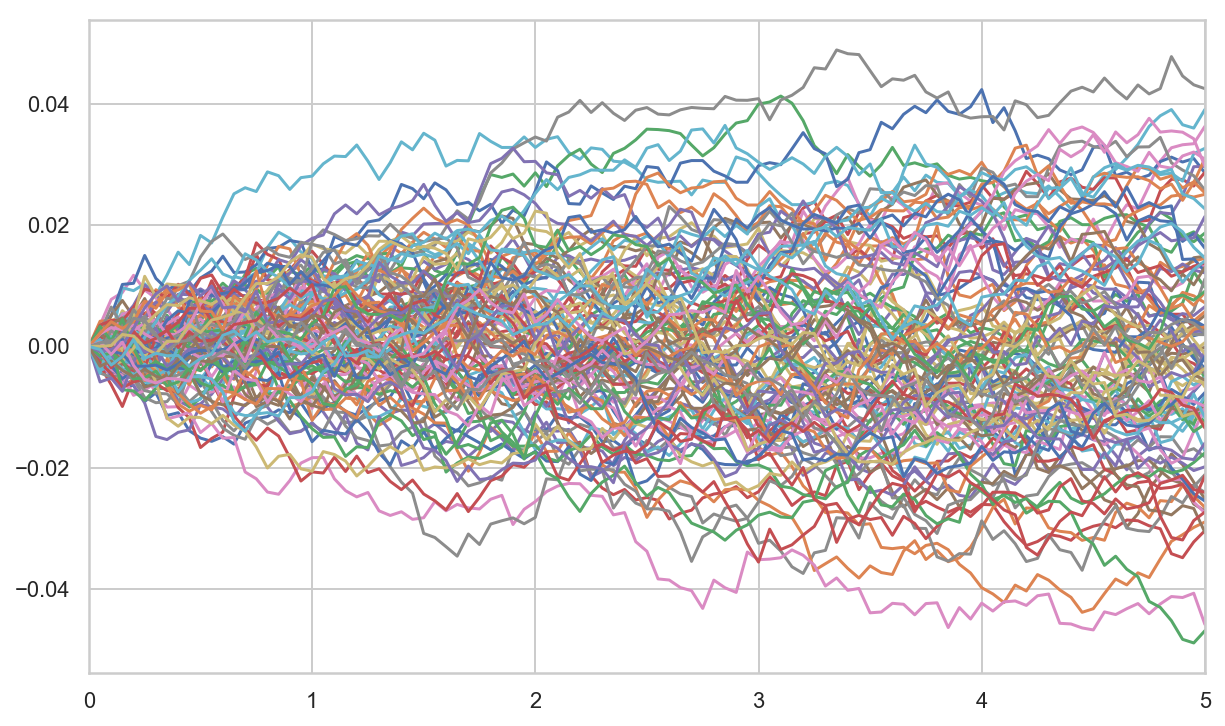

In [39]:
hw = mc.HullWhiteProcess( mr = mr, sigma = sigma, x0 = x0, measure = 'RN')
df = hw.generate_paths(until=T, timestep=timestep, spotstep=spotstep)
if spotstep<= 100:
    df.plot(legend = False)

<font size="5">
$X_{T}=e^{-a(T-t)} X_{t}+\int_{t}^{T} e^{-a(T-s)} \sigma_{s} d W_{s}$ <br>
$X_{T} | \mathcal{F}_{0} \sim \mathcal{N}\left(0, \int_{0}^{T} e^{-2 a(T-s)} \sigma_{s}^{2} d s\right)$
</font>

## Realized Xt average

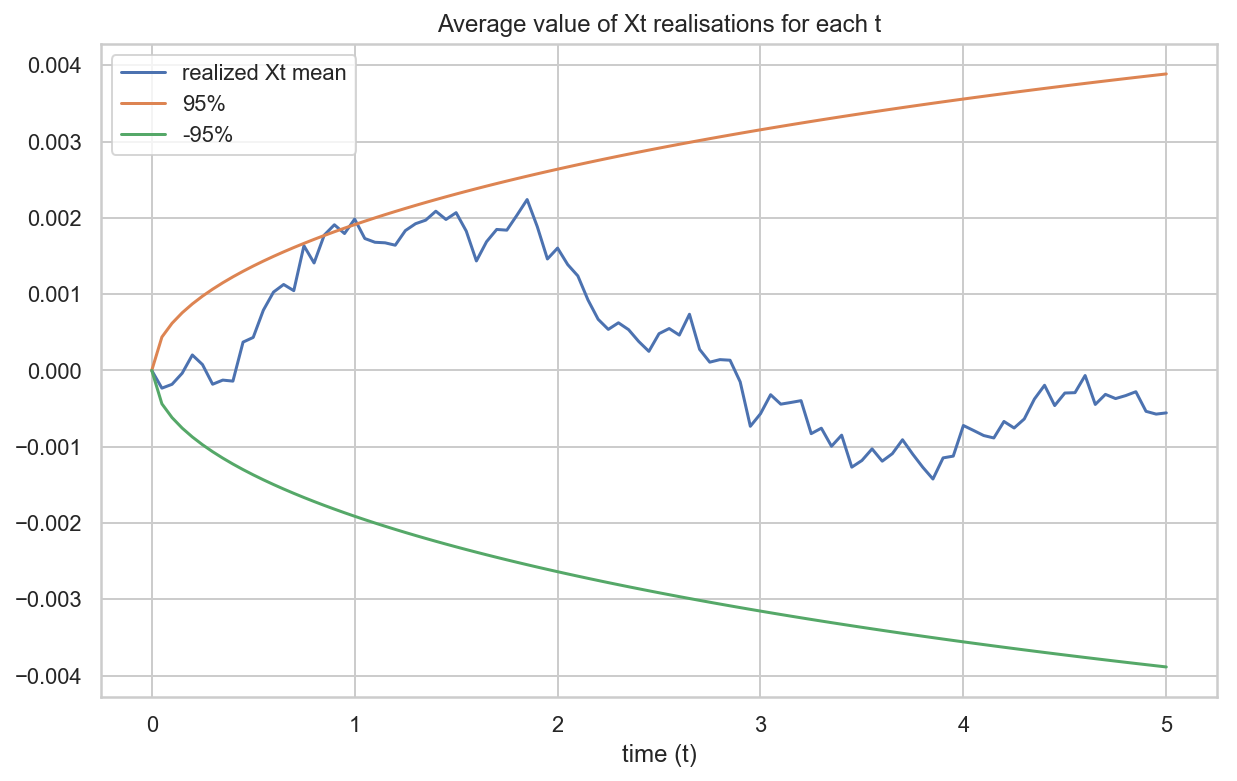

In [40]:
plt.plot(tt, [df.loc[t].mean() for t in tt], label = 'realized Xt mean');
plt.plot(tt, [ 1.96 * sqrt(hw_helper.get_var_x(t, mr, sigma) / spotstep) for t in tt], label = '95%');
plt.plot(tt, [-1.96 * sqrt(hw_helper.get_var_x(t, mr, sigma) / spotstep) for t in tt], label = '-95%');
plt.title('Average value of Xt realisations for each t'); plt.xlabel('time (t)'); plt.legend()

### Realized Xt standard deviation vs Theoretical

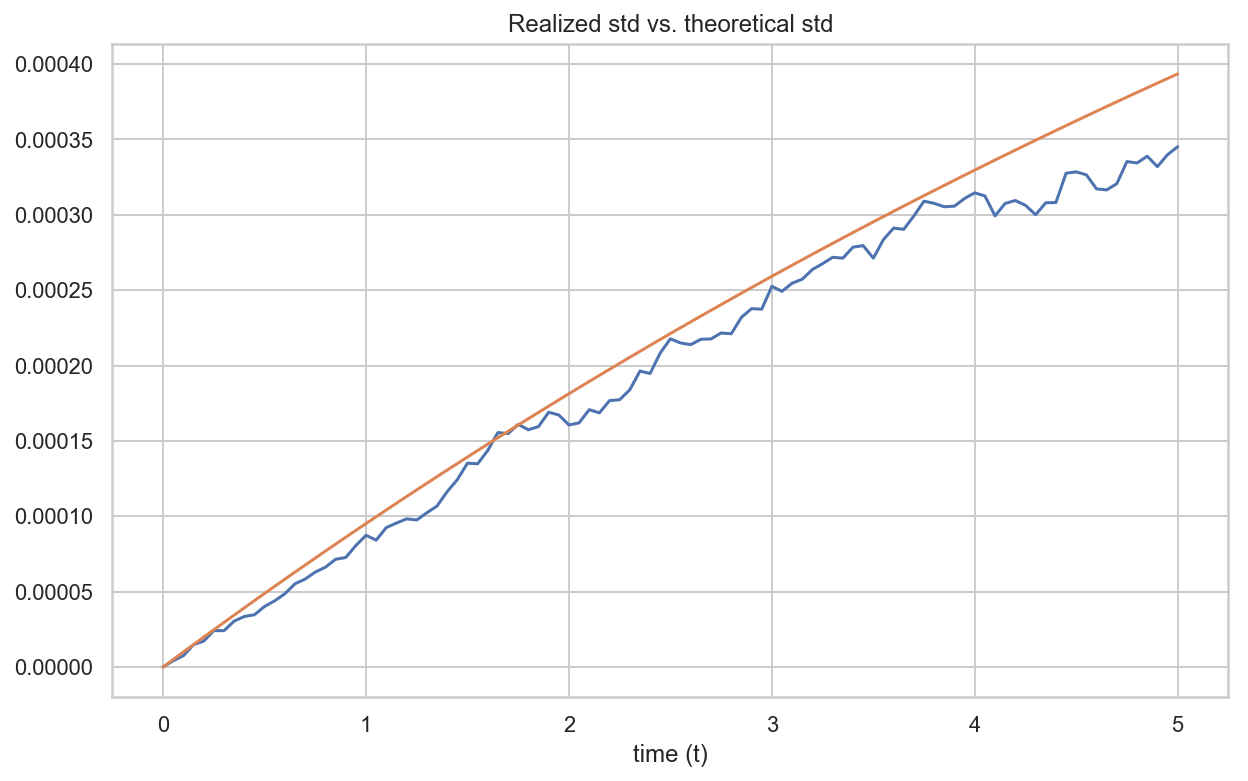

In [41]:
plt.plot(tt, [df.loc[t].std()**2 for t in tt]);
plt.plot(tt, [Jamshidian.get_var_x(t, mr, sigma) for t in tt]);
plt.title('Realized std vs. theoretical std'); plt.xlabel('time (t)');